##Курсова робота##

**Тема: Параллелізм у статистичних оцінках**

Головне питання: які статистичні оцінки можна виконувати маючи не єдиний набір данних, а розділенний на декілька частин. Мотивація данного питання полягає у тому, що у сучасному світі данних занадто багато, щоб зберігати їх в одному місці, тому виникає потреба аналізувати їх окремо, проте робити висновки щодо всього датасету.

**1. Оцінка початкових і центральних моментів**

Із означення початкового і центрального моменту маємо, що 

<center>$\nu_{k} = E[X^{k}]$<center>
<center>$\mu_{k} = E[(X-E[X])^{k}]$<center>




Відповідно оцінка цих величин для єдиного датасету з вибіркою $X = (\xi_{1}, \xi_{2}, ... , \xi_{n})$ виконується наступним чином:

<center>$\hat{\nu_{k}} = \frac{1}{n}{\displaystyle\sum_{i=1}^{n} \xi_{i}^{k}}$<center>
<center>$\hat{\mu_{k}} = \frac{1}{n}{\displaystyle\sum_{i=1}^{n} (\xi_{i}-\nu_{1})^{k}}$<center>

При розділенних данних вивести спільну оцінку для спільної вибірки не викличе великих труднощів. Нехай, нам на оцінку дали $m$ датасетів $X_{1} = (\xi_1^{(1)}, \xi_2^{(1)}, ... , \xi_{n_1}^{(1)}), X_2 = (\xi_1^{(2)}, \xi_2^{(2)}, ... , \xi_{n_2}^{(2)}), ..., X_m = (\xi_1^{(m)}, \xi_2^{(m)}, ... , \xi_{n_m}^{(m)})$. Тоді виконаємо відповідні розрахунки: спочатку для кожного конкретного датасету, додамо їх, а потім поділимо на суммарну кількість змінних.

<center>$\hat{\nu_{k}} = \frac{1}{n_1+n_2+...+n_m}{\displaystyle\sum_{i=1}^{m}\displaystyle\sum_{j=1}^{n_i} (\xi_j^{(i)})^{k}}$<center>
<center>$\hat{\mu_{k}} = \frac{1}{n_1+n_2+...+n_m}{\displaystyle\sum_{i=1}^{m}\displaystyle\sum_{j=1}^{n_i} (\xi_j^{(i)}-\nu_{1})^{k}}$<center>

Таким чином ми спочатку рахуємо відповідно суму для кожної оцінки, а потом додаємо всі суми і ділимо на кількість всіх доданків.

**2. KNN**

Для отримання результату KNN для розділенного датасету треба виконати наступні дії.

1. Зрозуміти яке значення $n$ потрібне для розв'язку задачі.

2. Для кожної точки треба виконати відповідний алгоритм KNN з заданим $n$.

3. Створити датасет в якому об'єднають відповідні $n$ найближчих точок.

4. Для кожного датасету провести повторити алгоритм KNN та зробити відповідну класифікацію.

**3. Лінійна регрессія** 

Нехай, ми маємо два датасети, які пов'язані якоюсь прямою у просторі. Спробуємо провести 3 експерименти.

1. Виконаємо генерацію два датасети де маємо просту лінійну залежність $y=kx+b$ і виконаємо деякі рівномірні девіації для кожної точки. Виконаємо лінійну регрессію окремо для кожного датасету і отримаємо $k_1, b_1, k_2, b_2, n_1, n_2 $ - кількість точок у кожному датасеті. Спробуємо виконати дану операцію багато разів і таких чином створити датасет для тренування нейронної мережі яка має навчитись перетворювати розділенні дані у єдині.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
np.random.seed(43)
%matplotlib inline

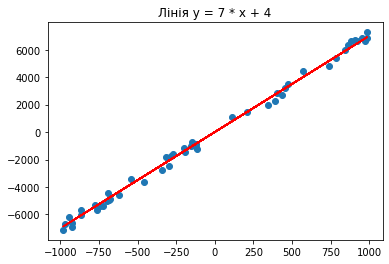

In [2]:
# Створюємо функцію для генерації випадкових датасетів з заданою кількість 
# і відповідними k i b з деякими відхиленнями


def create_set(n, k, b):
  x = np.array(np.random.randint(-1000, 1000, size = n))
  y = np.array(k * x + b + np.random.randint(-500, 500, size = n))
  return x, y


# Будуємо графік для перевірки роботи функції

k = 7
b = 4
n = 50
x, y = create_set(n, k, b)

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set(title='Лінія y = {} * x + {}'.format(k, b))
plt.plot(x, k*x + b, linestyle='solid', color='red')
    
plt.show()

На графіку видно, що функція працює вірно. Поділимо наші точки на дві частини і спробуємо навчити нейронну мережу для правильної взаємодії.

In [3]:
# Спочатку створимо функцію яка дозволить створити датасет, поділити його,
# провести лінійну регрессія для двух частин, і повернути початкові значення, та нові
def nkb(n, p = False):
  k = np.random.randint(-20, 20)
  b = np.random.randint(-100, 100)
  x, y = create_set(n, k, b)
  n1 = int(np.random.randint(20, n-20))
  n2 = n - n1
  x1, x2, y1, y2 = train_test_split(x, y, test_size = n1/n)
  x1, x2 = x1.reshape(-1, 1), x2.reshape(-1, 1)
  l1 = LinearRegression()
  l1.fit(x1, y1)
  l2 = LinearRegression()
  l2.fit(x2, y2)
  if p == True:
    print(l1.coef_[0], l1.intercept_, n1)
    print(l2.coef_[0], l2.intercept_, n2)
    print(k, b, n)
  return np.array([l1.coef_[0], l1.intercept_, n1, l2.coef_[0], l2.intercept_, n2]), np.array([k, b])

Створимо наш датасет вже оброблений після лінійної регрессії.

In [4]:
coefs = []
targets = []
for i in range(10000):
  n = np.random.randint(5000, 10000)
  coef, target = nkb(n)
  coefs.append(coef)
  targets.append(target)
coefs = np.array(coefs)
targets = np.array(targets)
print(coefs.shape, targets.shape)
X_train, X_test, Y_train, Y_test = train_test_split(coefs, targets, test_size = 0.2)


(10000, 6) (10000, 2)


Створимо нейронну мережу для обробки наших данних. 

In [5]:
import tensorflow as tf
import math
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
model = tf.keras.Sequential([
              Dense(10, kernel_initializer='normal', activation='relu', input_shape = (6,)),
              Dense(5,  kernel_initializer='normal'),
              Dense(2,  kernel_initializer='normal')
])
opt = tf.keras.optimizers.Adam(
    learning_rate=0.00005,
    beta_1=0.7,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,
)
model.compile(loss='mean_squared_error', optimizer=opt)

history = model.fit(X_train, Y_train, epochs=1000, 
                    validation_data=(X_test, Y_test))
                    

Epoch 1/1000
250/250 [==============================] - 1s 3ms/step - loss: 1745.7383 - val_loss: 1760.9943
Epoch 2/1000
250/250 [==============================] - 0s 1ms/step - loss: 1744.9392 - val_loss: 1760.5012
Epoch 3/1000
250/250 [==============================] - 0s 2ms/step - loss: 1744.3793 - val_loss: 1760.2416
Epoch 4/1000
250/250 [==============================] - 0s 1ms/step - loss: 1743.7427 - val_loss: 1759.8722
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 1742.8934 - val_loss: 1759.3800
Epoch 6/1000
250/250 [==============================] - 0s 1ms/step - loss: 1741.5645 - val_loss: 1758.5354
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 1739.4530 - val_loss: 1756.7343
Epoch 8/1000
250/250 [==============================] - 0s 1ms/step - loss: 1735.9794 - val_loss: 1753.9856
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 1732.2969 - val_loss: 1750.6437
Epoch 10/1000
250/250 [=====

Як ми бачимо наша модель показує дуже гарні результати, перевіримо її на конкретному прикладі.

In [7]:
coef, target = nkb(1000)
print(model.predict(coef.reshape(1, 6)))
print(target)

[[-3.803247 42.354004]]
[-4 49]


Для однієї змінної все спрацювало дуже добре, тоді виконаємо оцінку для $n$ = 3 змінних.

In [8]:
def create_set_n(n, k, b, dim = 3):
  x = np.random.randint(-1000, 1000, size = (n, dim))
  y = np.dot(k, x.T) + b + np.random.randint(-1000, 1000, size = n)
  return x, y

In [9]:
# Спочатку створимо функцію яка дозволить створити датасет, поділити його,
# провести лінійну регрессія для двух частин, і повернути початкові значення, та нові
def nkb_n(n, dim = 3, p = False):
  k = np.random.randint(-20, 20, size = (1, dim))
  b = np.random.randint(-100, 100)
  x, y = create_set_n(n, k, b)
  n1 = int(np.random.randint(20, n-20))
  n2 = n - n1
  x1, x2, y1, y2 = train_test_split(x, y.reshape(n, 1), test_size = n1/n)
  l1 = LinearRegression()
  l1.fit(x1, y1)
  l2 = LinearRegression()
  l2.fit(x2, y2)
  if p == True:
    print(l1.coef_[0], l1.intercept_, n1)
    print(l2.coef_[0], l2.intercept_, n2)
    print(k, b, n)
  return np.array([np.concatenate((l1.coef_[0],l1.intercept_, n1, l2.coef_[0], l2.intercept_, n2), axis=None)]), np.array([np.concatenate((k, b), axis=None)])
nkb_n(1000)

(array([[-19.98635336,  -4.16253169,   3.99416493,   7.09791351,
         590.        , -19.95765451,  -4.02740038,   4.05790091,
          29.14370226, 410.        ]]), array([[-20,  -4,   4,  38]]))

In [10]:
dim = 3
n = np.random.randint(1000, 10000)
coefs_n, targets_n = nkb_n(n, dim = dim)
for i in range(10000):
  n = np.random.randint(1000, 10000)
  coef, target = nkb_n(n, dim = dim)
  coefs_n = np.concatenate((coefs_n, coef), axis = 0)
  targets_n = np.concatenate((targets_n, target), axis = 0)

print(coefs_n.shape, targets_n.shape)
X_train, X_test, Y_train, Y_test = train_test_split(coefs_n, targets_n, test_size = 0.2)

(10001, 10) (10001, 4)


Знову створюємо нейронну мережу.

In [ ]:
model2 = tf.keras.Sequential([
              Dense(15, kernel_initializer='normal', activation='relu', input_shape = (2*dim + 4,)),
              Dense(8,  kernel_initializer='normal'),
              Dense(dim + 1,  kernel_initializer='normal')
])
opt = tf.keras.optimizers.Adam(
    learning_rate=0.00005,
    beta_1=0.7,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
)
model2.compile(loss='mean_squared_error', optimizer=opt)

history = model2.fit(X_train, Y_train, epochs=1000,
                    validation_data=(X_test, Y_test))

Epoch 1/1000
250/250 [==============================] - 1s 2ms/step - loss: 945.3716 - val_loss: 948.9646
Epoch 2/1000
250/250 [==============================] - 0s 2ms/step - loss: 933.5164 - val_loss: 944.1786
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 929.9166 - val_loss: 941.7034
Epoch 4/1000
250/250 [==============================] - 0s 1ms/step - loss: 927.1176 - val_loss: 938.9357
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 923.5277 - val_loss: 933.9576
Epoch 6/1000
250/250 [==============================] - 0s 2ms/step - loss: 914.3272 - val_loss: 920.9390
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 897.6451 - val_loss: 897.7146
Epoch 8/1000
250/250 [==============================] - 0s 1ms/step - loss: 870.1620 - val_loss: 863.6384
Epoch 9/1000
250/250 [==============================] - 0s 2ms/step - loss: 824.8978 - val_loss: 804.8389
Epoch 10/1000
250/250 [=======================

І знову таки перевіряємо на прикладі.

In [ ]:
coef, target = nkb_n(1000, dim = dim)
print(model2.predict(coef.reshape(1, 2 * dim + 4)))
print(target)

[[ 14.879413   -7.3860893 -17.548729  -42.3286   ]]
[[ 15  -7 -18 -60]]


**4. Висновок**

Підсумуючі, можна сказати, що стандартні статистичні операції можна виконувати незалежно від того розділенні дані чи ні. Деякі операції можна виконати використовуючи чисту математику, деякі через використання нейронних мереж, для вивидення скаладних формул через них.